- [hierarchical-clustering-explanation](https://www.kaggle.com/code/vipulgandhi/hierarchical-clustering-explanation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn .preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc

In [7]:
raw_df = pd.read_csv('./data/CC GENERAL.csv')
raw_df = raw_df.drop('CUST_ID', axis=1)
raw_df.fillna(method='ffill', inplace=True)
raw_df.head(2)

C:\Users\minna\AppData\Local\Temp\ipykernel_15584\3091593512.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_df.fillna(method='ffill', inplace=True)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


In [9]:
sc = StandardScaler()
sc_df = sc.fit_transform(raw_df)
norm_df = normalize(sc_df)
df = pd.DataFrame(norm_df)

pca = PCA(n_components=2)
x_pr = pca.fit_transform(df)
x_pr = pd.DataFrame(x_pr)
x_pr.columns=['P1', 'P2']
x_pr.head()

,P1,P2
0,-0.489949,-0.679976
1,-0.519099,0.544827
2,0.330633,0.268879
3,-0.481656,-0.097611
4,-0.563512,-0.482506


In [ ]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(x_pr, method ='ward'))) 

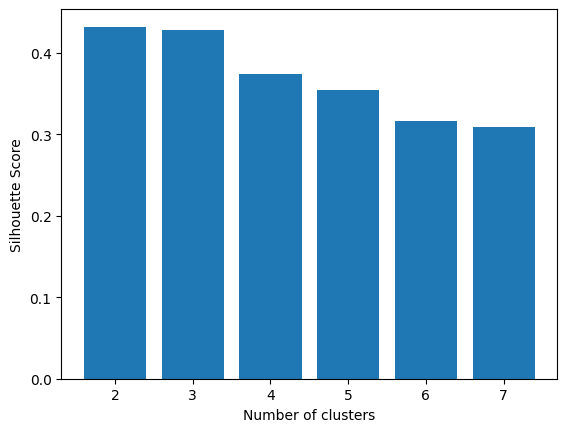

In [18]:
sil_scores = []
k = [2,3,4,5,6,7]

for n_clust in k:
    sil_scores.append(
        silhouette_score(x_pr, AgglomerativeClustering(n_clusters=n_clust).fit_predict(x_pr))
    )
plt.bar(k, sil_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [19]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(x_pr)

,n_clusters,3
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


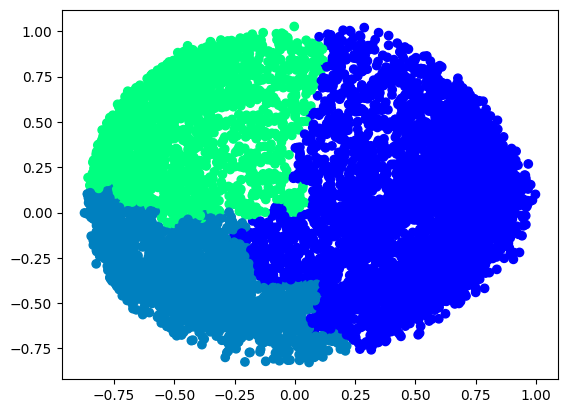

In [20]:
plt.scatter(x_pr['P1'], x_pr['P2'],  
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(x_pr), cmap =plt.cm.winter) 
plt.show() 